### Dataset Description


artist: Name of the Artist.

song: Name of the Track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.

### Description

Training dataset: 14395 rows with 18 columns

Column details: artist name; track name; popularity; ‘danceability’; energy; key; loudness; mode; ‘speechiness’; ‘acousticness’; ‘instrumentalness’; liveness; valence; tempo; duration in milliseconds and time_signature.

Target Variable: 'Class’ such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood,

Test dataset: 3600 rows with 17 col

### Evaluation

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv',index_col=0)
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,,,,,,,,,,,,,,,,,
1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [3]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Id,,,,,,,,,,,,,,,,
14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14396 entries, 1 to 14396
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Class    

In [5]:
train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [6]:
train.isna().sum()

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [7]:
test.isna().sum()

Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [8]:
len(train) 

14396

In [9]:
unique=train.drop_duplicates()

In [10]:
len(unique)

14396

In [11]:
# check unique values for nominal features

top=train['Artist Name'].value_counts()[:30]
top.index

Index(['Backstreet Boys', 'Westlife', 'Britney Spears', 'Omer Adam',
       'Eyal Golan', 'Shlomo Artzi', 'Dudu Aharon', 'Arik Einstein',
       'Hadag Nahash', 'Moshe Peretz', 'Itay Levi', 'The Rolling Stones',
       'Yehudit Ravitz', 'Lata Mangeshkar', 'Dudu Tassa', 'Metallica', 'AC/DC',
       'Berry Sakharof', 'U2', 'Shalom Hanoch', 'Sarit Hadad', 'Led Zeppelin',
       'Eliad', 'Ravid Plotnik', 'The Beatles', 'The Killers',
       'The Black Keys', 'Creedence Clearwater Revival', 'Ehud Banai',
       'Yuval Dayan'],
      dtype='object', name='Artist Name')

In [12]:
train['Track Name'].value_counts()

Track Name
Fire                              8
Ghost                             7
Runaway                           7
Forever                           6
Dreams                            6
                                 ..
Tangerine                         1
Three Alley Cats                  1
◊™◊ë◊ï◊ê◊ô ◊î◊ô◊ï◊ù               1
In My Room                        1
Before the Next Teardrop Falls    1
Name: count, Length: 12455, dtype: int64

I believe that if new songs were released with the same name that exists in our data, it will not necessarily get the same class. So, the track name here is not a predictive feature, so we can safely drop it.

In [13]:
tr1=train.drop(['Track Name'], axis=1)
tr1.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,,,,,,,,,,,,,,,,
1,Marina Maximilian,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
2,The Black Keys,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
3,Royal & the Serpent,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
4,Detroit Blues Band,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
5,Coast Contra,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


For the null values, let's replace theim with column's median

In [14]:
tr2=tr1.copy()

tr2['Popularity']=tr1['Popularity'].fillna(tr1['Popularity'].median())
tr2['key']=tr1['key'].fillna(tr1['key'].median())
tr2['instrumentalness']=tr1['instrumentalness'].fillna(tr1['instrumentalness'].median())

tr2.head(2)

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,,,,,,,,,,,,,,,,
1,Marina Maximilian,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.3780,0.00392,0.106,0.235,152.429,204947.0,4,9
2,The Black Keys,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.0272,0.04680,0.104,0.380,132.921,191956.0,4,6


In [15]:
tr2.isna().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [16]:
# check class distribution
train['Class'].value_counts()

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64

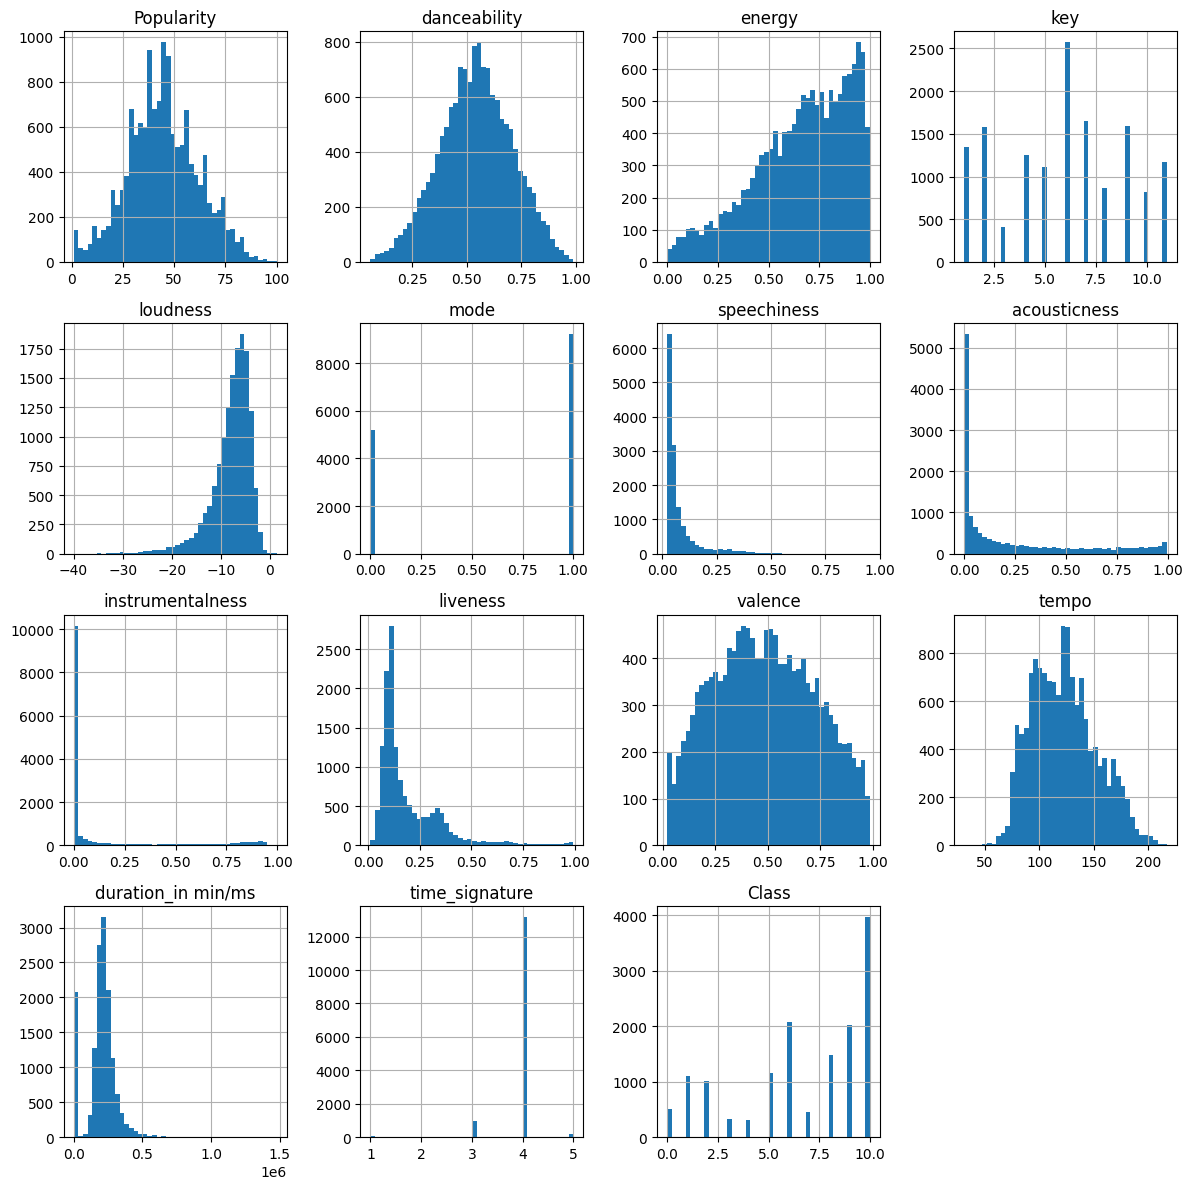

<Figure size 640x480 with 0 Axes>

In [17]:
# checking distributions
tr2.hist(figsize=(12,12), bins=44)
plt.tight_layout()
plt.show()
plt.clf()

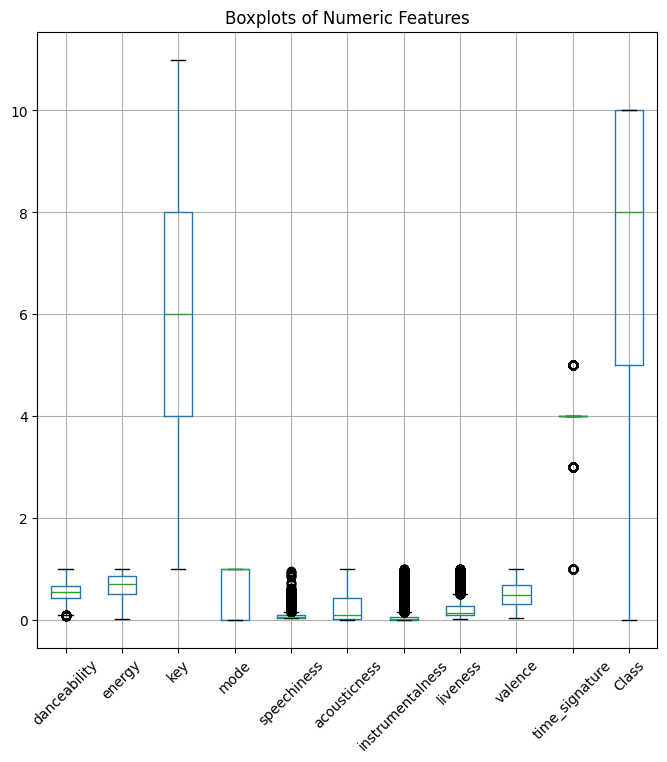

<Figure size 640x480 with 0 Axes>

In [18]:
tr2.drop(["duration_in min/ms","Popularity","tempo",'loudness'],axis=1).boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

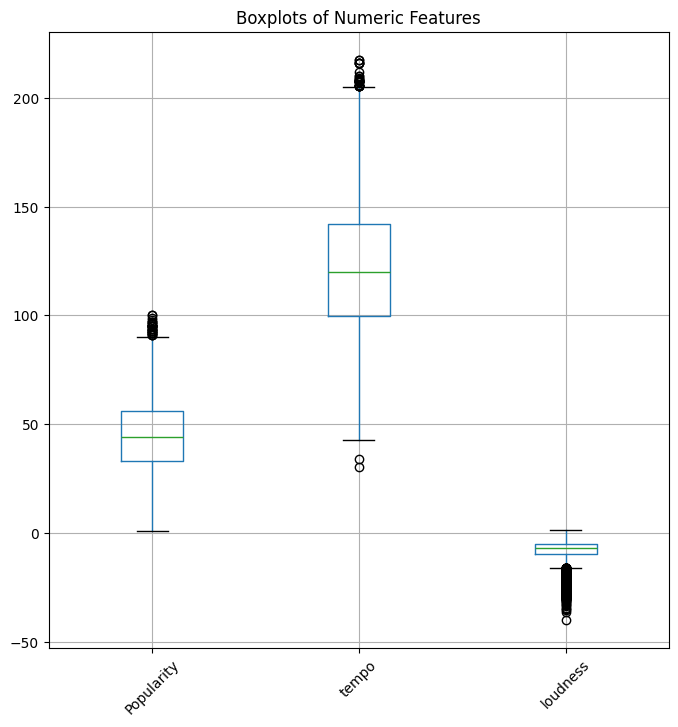

<Figure size 640x480 with 0 Axes>

In [19]:
tr2[["Popularity","tempo",'loudness']].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

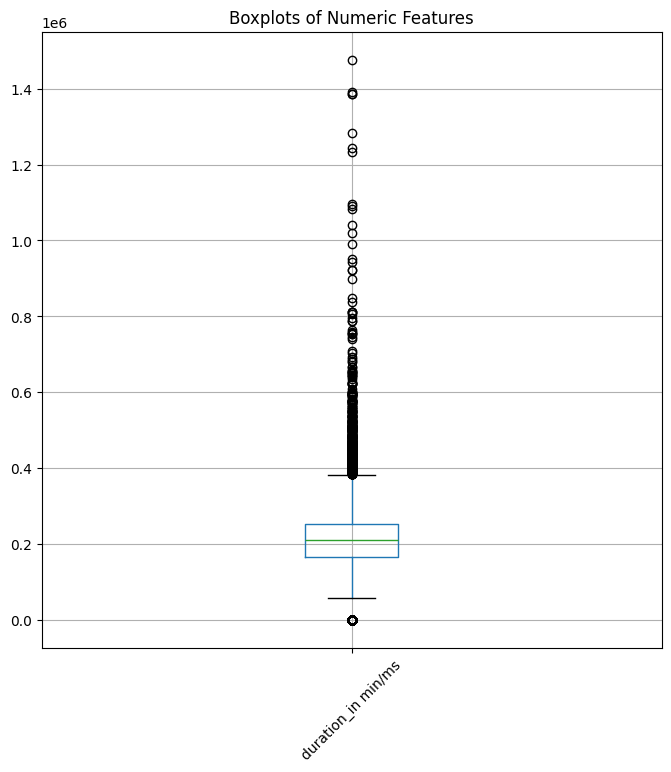

<Figure size 640x480 with 0 Axes>

In [20]:
tr2[["duration_in min/ms"]].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

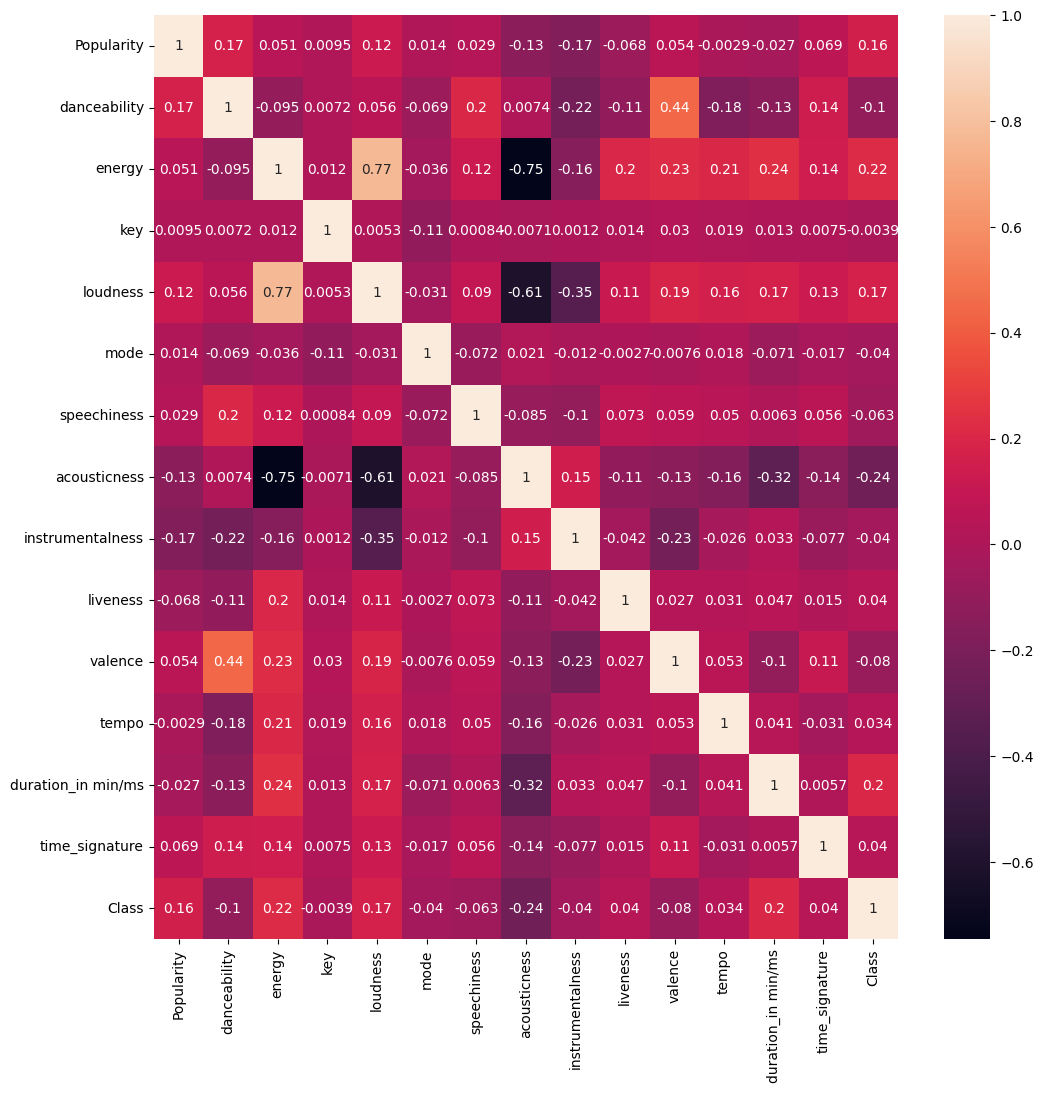

<Figure size 640x480 with 0 Axes>

In [21]:
#looking at the correlations between numeric features
num = tr2.select_dtypes(include=np.number)
correlation_matrix = num.corr()

plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix,annot = True)
plt.show()
plt.clf()

In [22]:
#!pip3 install catboost

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X=tr2.drop(columns=['Class'], axis=1)
y=tr2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [26]:
cat_features = ['Artist Name']
one_hot_max_size = 25

model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1,
                           verbose=False, cat_features=cat_features, one_hot_max_size=one_hot_max_size)
 
# Fit the model to the training data
model.fit(X_train, y_train)
ypred=model.predict(X_test)

In [27]:
f1_score(y_test, ypred, average='macro')

0.6672393169129226

In [28]:
test.isna().sum()

Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [29]:
test2=test.copy()
test2['Popularity']=test2['Popularity'].fillna(test2['Popularity'].median())
test2['key']=test2['key'].fillna(test2['key'].median())
test2['instrumentalness']=test2['instrumentalness'].fillna(test2['instrumentalness'].median())


In [30]:
test3=test2.drop(columns=['Track Name'], axis=1)

In [31]:
submit=model.predict(test3)

In [32]:
# sub2=pd.DataFrame(data=submit, columns=['Class'], index=test.index)
# sub2.head()

In [33]:
# sub2.to_csv('submission.csv')

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


freq_encoding = tr2['Artist Name'].value_counts(normalize = True)
tr2['Artist Name'] = tr2['Artist Name'].map(freq_encoding)

X=tr2.drop(columns=['Class'], axis=1)
X = scaler.fit_transform(X)
y=tr2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),  
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    results[name] = ypred
    print(f"{name} f1-score: {f1_score(y_test, ypred, average='macro')}")

Logistic Regression f1-score: 0.5478485789665234
Decision Tree f1-score: 0.47819774499852713
Random Forest f1-score: 0.5935735756243485
